In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
import os

In [2]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [3]:
#import os
#os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle/"

In [4]:
#%cd /content/gdrive/My Drive/Kaggle/Books Data with Category Language and Summary

In [5]:
#!ls

In [6]:
df = pd.read_csv(os.path.join("Preprocessed_data.csv"))
df.head()

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
0,0,2,"stockton, california, usa",18.0000,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Provides an introduction to classical myths pl...,en,['Social Science'],stockton,california,usa
1,1,8,"timmins, ontario, canada",34.7439,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],timmins,ontario,canada
2,2,11400,"ottawa, ontario, canada",49.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],ottawa,ontario,canada
3,3,11676,"n/a, n/a, n/a",34.7439,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],NaN,NaN,NaN
4,4,41385,"sudbury, ontario, canada",34.7439,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],sudbury,ontario,canada


In [7]:
book_df = pd.DataFrame(df["book_title"])
book_df

,book_title
0,Classical Mythology
1,Clara Callan
2,Clara Callan
3,Clara Callan
4,Clara Callan
...,...
1031170,As Hogan Said . . . : The 389 Best Things Anyo...
1031171,All Elevations Unknown: An Adventure in the He...
1031172,Why stop?: A guide to Texas historical roadsid...
1031173,The Are You Being Served? Stories: 'Camping In...


In [8]:
book_df_groups = df.groupby(['book_title'])
book_df_groups

In [9]:
#Make the book list smaller by looking only at books where 100 people have read them
group_with_one = book_df_groups.count()
group = group_with_one[group_with_one["user_id"] > 556]

In [10]:
group.sort_values(["user_id"], ascending= False)
group.reset_index(level=0, inplace=True)

In [11]:
# for books which over 556 people have read
# 385 is the median number of times a book is bought by our 278,858 users
#User count over 834 (278*3); median number is 1096.5
# 446 is the mean number of times a book is bough by our 278,858 users
group["user_id"].median()

662.0

In [12]:
# Median books: Life of Pi
# for Over 834: The Lovely Bones: A Novel

mean_books = group[group["user_id"] > 662]
mean_books.sort_values(['user_id'], ascending= True)

,book_title,Unnamed: 0,user_id,location,age,isbn,rating,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
6,Life of Pi,664,664,664,664,664,664,664,664,664,664,664,664,664,664,664,657,650,651
1,Angels & Demons,670,670,670,670,670,670,670,670,670,670,670,670,670,670,670,667,663,660
17,The Red Tent (Bestselling Backlist),723,723,723,723,723,723,723,723,723,723,723,723,723,723,723,721,715,693
3,Divine Secrets of the Ya-Ya Sisterhood: A Novel,740,740,740,740,740,740,740,740,740,740,740,740,740,740,740,739,731,724
18,The Secret Life of Bees,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,770,762,751
2,Bridget Jones's Diary,815,815,815,815,815,815,815,815,815,815,815,815,815,815,815,809,801,788
13,The Nanny Diaries: A Novel,828,828,828,828,828,828,828,828,828,828,828,828,828,828,828,822,818,800
0,A Painted House,838,838,838,838,838,838,838,838,838,838,838,838,838,838,838,836,827,808
9,The Da Vinci Code,898,898,898,898,898,898,898,898,898,898,898,898,898,898,898,891,890,882
12,The Lovely Bones: A Novel,1295,1295,1295,1295,1295,1295,1295,1295,1295,1295,1295,1295,1295,1295,1295,1291,1273,1227


In [13]:
book_list = pd.DataFrame(group["book_title"])
book_list

,book_title
0,A Painted House
1,Angels & Demons
2,Bridget Jones's Diary
3,Divine Secrets of the Ya-Ya Sisterhood: A Novel
4,Harry Potter and the Sorcerer's Stone (Harry P...
5,House of Sand and Fog
6,Life of Pi
7,Snow Falling on Cedars
8,Summer Sisters
9,The Da Vinci Code


Building a Book-User Matrix

In [14]:
model_df = pd.merge(df, book_list, on="book_title")
model_df

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
0,98,9,"germantown, tennessee, usa",34.7439,0440234743,0,The Testament,John Grisham,1999.0,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,"A suicidal billionaire, a burnt-out Washington...",en,['Fiction'],germantown,tennessee,usa
1,99,243,"arden hills, minnesota, usa",34.7439,0440234743,0,The Testament,John Grisham,1999.0,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,"A suicidal billionaire, a burnt-out Washington...",en,['Fiction'],arden hills,minnesota,usa
2,100,388,"nashville, tennessee, usa",35.0000,0440234743,0,The Testament,John Grisham,1999.0,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,"A suicidal billionaire, a burnt-out Washington...",en,['Fiction'],nashville,tennessee,usa
3,101,2977,"richland, washington, usa",25.0000,0440234743,0,The Testament,John Grisham,1999.0,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,"A suicidal billionaire, a burnt-out Washington...",en,['Fiction'],richland,washington,usa
4,102,3329,"grantsville, utah, usa",34.7439,0440234743,8,The Testament,John Grisham,1999.0,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,"A suicidal billionaire, a burnt-out Washington...",en,['Fiction'],grantsville,utah,usa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17938,260245,273979,"bloomsburg, pennsylvania, usa",20.0000,0385503822,0,The Summons,John Grisham,2002.0,Doubleday Books,http://images.amazon.com/images/P/0385503822.0...,http://images.amazon.com/images/P/0385503822.0...,http://images.amazon.com/images/P/0385503822.0...,"For the first time since A Time to Kill, the a...",en,['Fiction'],bloomsburg,pennsylvania,usa
17939,260246,274549,"san diego, california, usa",34.7439,0385503822,0,The Summons,John Grisham,2002.0,Doubleday Books,http://images.amazon.com/images/P/0385503822.0...,http://images.amazon.com/images/P/0385503822.0...,http://images.amazon.com/images/P/0385503822.0...,"For the first time since A Time to Kill, the a...",en,['Fiction'],san diego,california,usa
17940,260247,277114,"jefferson, louisiana, usa",34.7439,0385503822,0,The Summons,John Grisham,2002.0,Doubleday Books,http://images.amazon.com/images/P/0385503822.0...,http://images.amazon.com/images/P/0385503822.0...,http://images.amazon.com/images/P/0385503822.0...,"For the first time since A Time to Kill, the a...",en,['Fiction'],jefferson,louisiana,usa
17941,703644,40415,"san francisco, california, usa",34.0000,0375431977,4,The Summons,John Grisham,2002.0,Random House Large Print Publishing,http://images.amazon.com/images/P/0375431977.0...,http://images.amazon.com/images/P/0375431977.0...,http://images.amazon.com/images/P/0375431977.0...,9,9,9,san francisco,california,usa


In [15]:
user_book_df = model_df.drop(["Unnamed: 0", "location","age", "isbn", "rating", "book_author", "year_of_publication", "publisher", "img_m", "img_l", "img_s", "Summary", "city", "Language","Category", "state", "country"], axis=1)
user_book_df

,user_id,book_title
0,9,The Testament
1,243,The Testament
2,388,The Testament
3,2977,The Testament
4,3329,The Testament
...,...,...
17938,273979,The Summons
17939,274549,The Summons
17940,277114,The Summons
17941,40415,The Summons


In [16]:
user_matrix = pd.get_dummies(user_book_df["book_title"])
user_matrix

,A Painted House,Angels & Demons,Bridget Jones's Diary,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),House of Sand and Fog,Life of Pi,Snow Falling on Cedars,Summer Sisters,The Da Vinci Code,...,The Nanny Diaries: A Novel,The Notebook,The Pelican Brief,The Pilot's Wife : A Novel,The Red Tent (Bestselling Backlist),The Secret Life of Bees,The Summons,The Testament,Where the Heart Is (Oprah's Book Club (Paperback)),Wild Animus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17938,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
17939,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
17940,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
17941,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [17]:
combined_df = pd.concat([user_book_df,user_matrix], axis=1)
combined_df.drop(['book_title'], axis=1, inplace=True)
combined_df

,user_id,A Painted House,Angels & Demons,Bridget Jones's Diary,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),House of Sand and Fog,Life of Pi,Snow Falling on Cedars,Summer Sisters,...,The Nanny Diaries: A Novel,The Notebook,The Pelican Brief,The Pilot's Wife : A Novel,The Red Tent (Bestselling Backlist),The Secret Life of Bees,The Summons,The Testament,Where the Heart Is (Oprah's Book Club (Paperback)),Wild Animus
0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,243,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,388,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2977,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,3329,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17938,273979,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
17939,274549,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
17940,277114,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
17941,40415,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [18]:
groups = combined_df.groupby('user_id')
groups

In [19]:
book_matrix = groups.sum()
book_matrix.head()

,A Painted House,Angels & Demons,Bridget Jones's Diary,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),House of Sand and Fog,Life of Pi,Snow Falling on Cedars,Summer Sisters,The Da Vinci Code,...,The Nanny Diaries: A Novel,The Notebook,The Pelican Brief,The Pilot's Wife : A Novel,The Red Tent (Bestselling Backlist),The Secret Life of Bees,The Summons,The Testament,Where the Heart Is (Oprah's Book Club (Paperback)),Wild Animus
user_id,,,,,,,,,,,,,,,,,,,,,
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
114,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
232,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
book_matrix.reset_index(level=0, inplace=True)



In [21]:
book_matrix.drop(['user_id'], axis=1, inplace=True)
book_matrix

,A Painted House,Angels & Demons,Bridget Jones's Diary,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),House of Sand and Fog,Life of Pi,Snow Falling on Cedars,Summer Sisters,The Da Vinci Code,...,The Nanny Diaries: A Novel,The Notebook,The Pelican Brief,The Pilot's Wife : A Novel,The Red Tent (Bestselling Backlist),The Secret Life of Bees,The Summons,The Testament,Where the Heart Is (Oprah's Book Club (Paperback)),Wild Animus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10020,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
10021,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10022,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
10023,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [22]:
#556: Life of Pi
#834: The Lovely Bones: A Novel
y = book_matrix["Life of Pi"]
y

0        0
1        0
2        0
3        0
4        0
        ..
10020    0
10021    0
10022    0
10023    0
10024    0
Name: Life of Pi, Length: 10025, dtype: uint8

In [23]:
X = book_matrix.drop("Life of Pi", axis=1)
X.head()

,A Painted House,Angels & Demons,Bridget Jones's Diary,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),House of Sand and Fog,Snow Falling on Cedars,Summer Sisters,The Da Vinci Code,The Firm,...,The Nanny Diaries: A Novel,The Notebook,The Pelican Brief,The Pilot's Wife : A Novel,The Red Tent (Bestselling Backlist),The Secret Life of Bees,The Summons,The Testament,Where the Heart Is (Oprah's Book Club (Paperback)),Wild Animus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [25]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [26]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 0.953/0.916
k: 3, Train/Test Score: 0.966/0.949
k: 5, Train/Test Score: 0.963/0.952
k: 7, Train/Test Score: 0.961/0.953
k: 9, Train/Test Score: 0.960/0.953
k: 11, Train/Test Score: 0.960/0.953
k: 13, Train/Test Score: 0.960/0.954
k: 15, Train/Test Score: 0.960/0.954
k: 17, Train/Test Score: 0.960/0.954
k: 19, Train/Test Score: 0.960/0.954
k: 21, Train/Test Score: 0.959/0.954
k: 23, Train/Test Score: 0.960/0.954
k: 25, Train/Test Score: 0.960/0.954
k: 27, Train/Test Score: 0.960/0.954
k: 29, Train/Test Score: 0.960/0.954


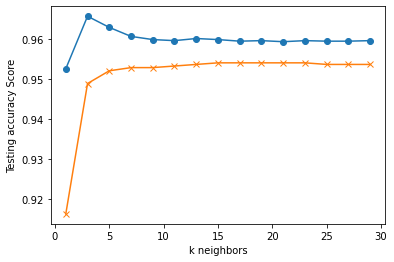

In [27]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 30, 2), train_scores, marker='o')
plt.plot(range(1, 30, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [28]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=13 Test Acc: 0.954


In [29]:
# 834; new_book_data = [[1,0,0]]
# with the 22 books training to predict Life of Pi. If I buy Wild Animus and nothing else, it is predicted that I will not buy Life of Pi
# Nothing -- buy 
# Buy (just one variable): [nothing bought yet; A Painted House; Angels & Demons; Bridget Jones's Diary; Divine Secrets of the Ya-Ya Sisterhood: A Novel; ...
#                              Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)); House of Sand and Fog; Snow Falling on Cedars; Summer Sisters; The Da Vinci Code; The Firm; ...
#                              The Girls' Guide to Hunting and Fishing; The Lovely Bones: A Novel; The Nanny Diaries: A Novel; The Notebook; The Red Tent (Bestselling Backlist); The Secret Life of Bees; The Summons; The Testament; ...
#                              Where the Heart Is (Oprah's Book Club (Paperback))]
# Won't buy (just one variable): [Wild Animus]
new_book_data = [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0]]
predicted_class = knn.predict(new_book_data)
print(predicted_class)

[1]
